# Modelling the interval of Low and High with VARIMAX

# Imports

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

# weekly data

Load datasets

In [14]:
weekly_M2_SP = pd.read_csv('./data/M2_SP500_week_aggr.csv')
weekly_M2_SP['Date'] =  pd.to_datetime(weekly_M2_SP['Date'],  format='%d/%m/%Y')
weekly_M2_SP.set_index('Date', inplace=True)
weekly_M2_SP

,Open,High,Low,Close,Volume,WM2NS
Date,,,,,,
1980-11-03,127.520000,129.114000,126.346000,127.752000,2.138778e+07,1595.2
1980-11-10,129.526000,131.478000,128.432000,129.588000,2.717556e+07,1601.2
1980-11-17,133.808000,136.410000,132.990000,135.448000,3.236111e+07,1602.9
1980-11-24,139.236000,140.904000,137.644000,139.316000,3.409556e+07,1594.8
1980-12-08,137.642222,138.794444,135.475556,136.892222,2.752593e+07,1605.3
...,...,...,...,...,...,...
2023-02-06,4101.172000,4145.708000,4083.252000,4124.626000,2.885387e+09,21152.8
2023-02-13,4113.722000,4144.576000,4084.638000,4118.222000,2.457369e+09,21086.2
2023-02-20,4109.585000,4131.482500,4084.107500,4113.307500,2.253886e+09,21080.4


# Seasonality

<Axes: xlabel='Date'>

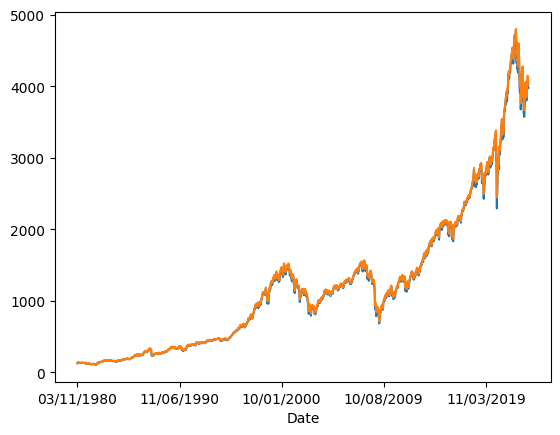

In [3]:
weekly_M2_SP['Low'].plot()
weekly_M2_SP['High'].plot()

In [15]:
display(sm.tsa.seasonal_decompose(weekly_M2_SP['Low'],model='additive').plot())
display(sm.tsa.seasonal_decompose(weekly_M2_SP['Low'],model='additive').plot())
# sm.tsa.seasonal_decompose(weekly_M2_SP['Low'],model='additive').seasonal.plot()

ValueError: You must specify a period or x must be a pandas object with a PeriodIndex or a DatetimeIndex with a freq not set to None

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

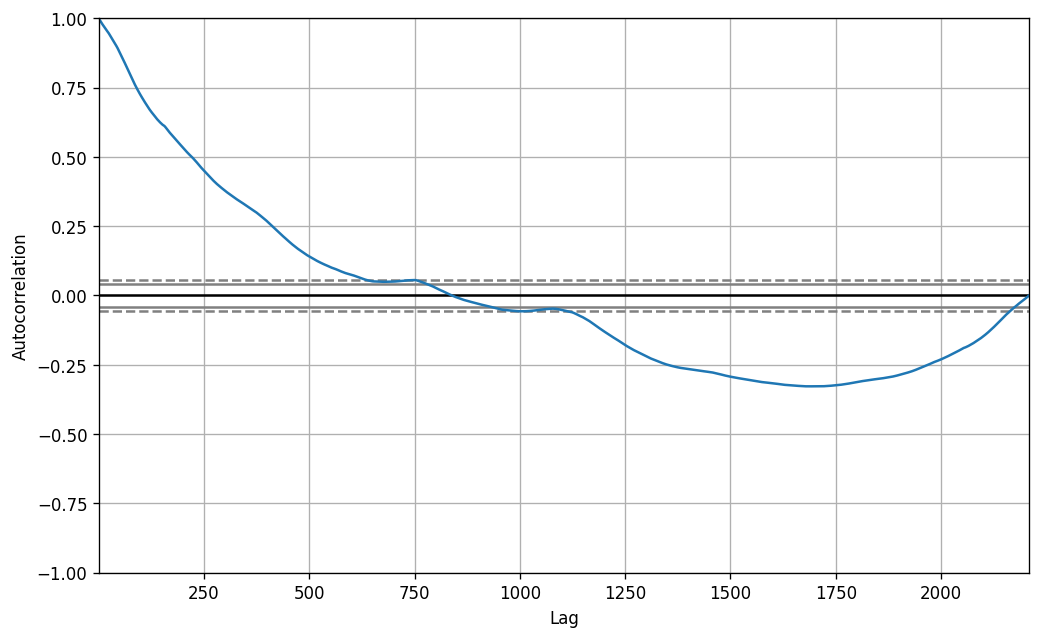

In [16]:
# Test for seasonality
from pandas.plotting import autocorrelation_plot

# Draw Plot
plt.rcParams.update({'figure.figsize':(10,6), 'figure.dpi':120})
autocorrelation_plot(weekly_M2_SP['Low'].tolist())

# Stationarity and test for no White Noise

## Imports

In [17]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss

In [18]:
def adf_test(timeseries):
    print("Results of Dickey-Fuller Test:")
    dftest = adfuller(timeseries, autolag="AIC")
    dfoutput = pd.Series(
        dftest[0:4],
        index=[
            "Test Statistic",
            "p-value",
            "#Lags Used",
            "Number of Observations Used",
        ],
    )
    for key, value in dftest[4].items():
        dfoutput["Critical Value (%s)" % key] = value
    print(dfoutput)

def kpss_test(timeseries):
    print("Results of KPSS Test:")
    kpsstest = kpss(timeseries, regression="c", nlags="auto")
    kpss_output = pd.Series(
        kpsstest[0:3], index=["Test Statistic", "p-value", "Lags Used"]
    )
    for key, value in kpsstest[3].items():
        kpss_output["Critical Value (%s)" % key] = value
    print(kpss_output)

## Low series

In [19]:
adf_test(weekly_M2_SP['Low'])
kpss_test(weekly_M2_SP['Low'])

Results of Dickey-Fuller Test:
Test Statistic                    1.198924
p-value                           0.995978
#Lags Used                       26.000000
Number of Observations Used    2182.000000
Critical Value (1%)              -3.433350
Critical Value (5%)              -2.862866
Critical Value (10%)             -2.567476
dtype: float64
Results of KPSS Test:
Test Statistic            5.847558
p-value                   0.010000
Lags Used                29.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


C:\Users\Qba\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


Basic series non-stationary

### Log and diff

<Axes: xlabel='Date'>

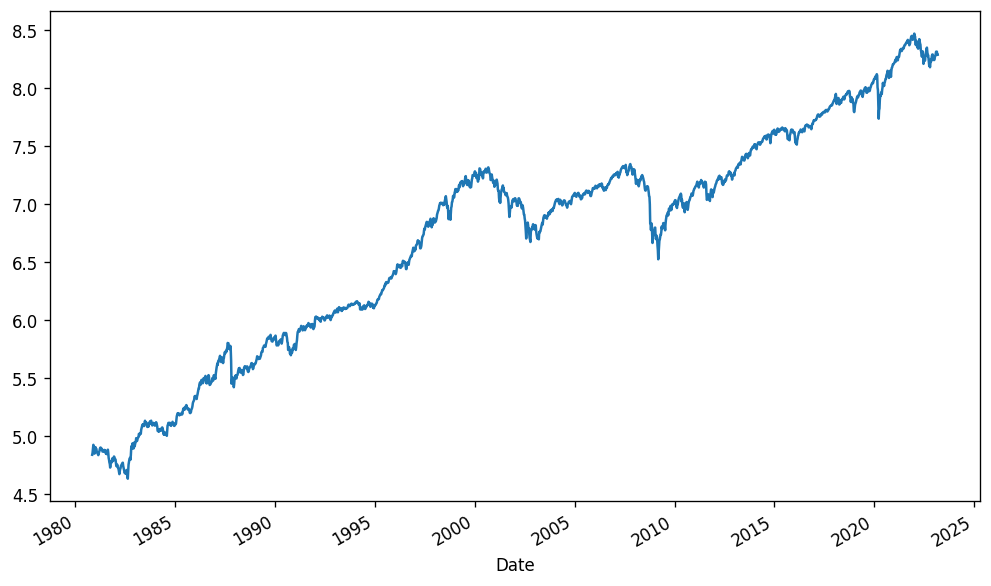

In [20]:
weekly_M2_SP['lnLow'] = np.log(weekly_M2_SP['Low'])
weekly_M2_SP['lnLow'].dropna().plot()

In [21]:
adf_test(weekly_M2_SP['lnLow'])
kpss_test(weekly_M2_SP['lnLow'])

Results of Dickey-Fuller Test:
Test Statistic                   -0.917628
p-value                           0.782112
#Lags Used                        7.000000
Number of Observations Used    2201.000000
Critical Value (1%)              -3.433325
Critical Value (5%)              -2.862854
Critical Value (10%)             -2.567470
dtype: float64
Results of KPSS Test:
Test Statistic            6.806765
p-value                   0.010000
Lags Used                29.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


C:\Users\Qba\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


Both tests show non-stationarity

<Axes: xlabel='Date'>

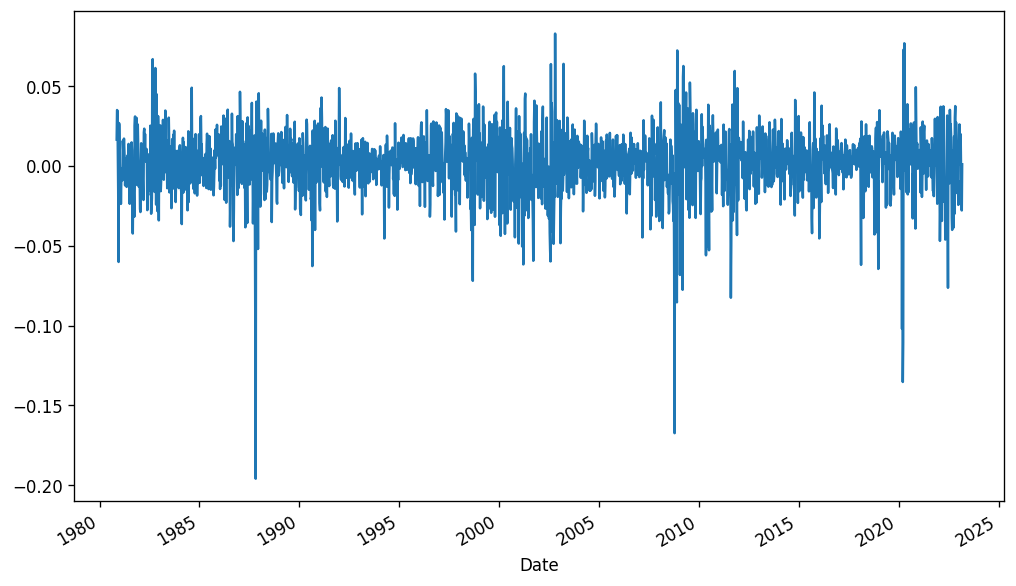

In [22]:
weekly_M2_SP['lnLow_diff1'] = weekly_M2_SP['lnLow']- weekly_M2_SP['lnLow'].shift(1)
weekly_M2_SP['lnLow_diff1'].dropna().plot()

In [23]:
adf_test(weekly_M2_SP['lnLow_diff1'].dropna())
kpss_test(weekly_M2_SP['lnLow_diff1'].dropna())

Results of Dickey-Fuller Test:
Test Statistic                -1.801765e+01
p-value                        2.701707e-30
#Lags Used                     6.000000e+00
Number of Observations Used    2.201000e+03
Critical Value (1%)           -3.433325e+00
Critical Value (5%)           -2.862854e+00
Critical Value (10%)          -2.567470e+00
dtype: float64
Results of KPSS Test:
Test Statistic           0.086617
p-value                  0.100000
Lags Used                6.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


C:\Users\Qba\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


Both tests show stationarity

### White noise test Ljung-Box

In [26]:
sm.stats.acorr_ljungbox(weekly_M2_SP['lnLow_diff1'].dropna(), lags=range(1,12), return_df=True)

,lb_stat,lb_pvalue
1,75.965055,2.887294e-18
2,76.184982,2.861814e-17
3,76.482081,1.743484e-16
4,80.967032,1.086696e-16
5,82.232810,2.860909e-16
6,85.122790,3.113317e-16
7,86.067279,7.925671e-16
8,86.291514,2.625607e-15
9,87.097991,6.211236e-15
10,88.743405,9.502668e-15


## High series

In [27]:
adf_test(weekly_M2_SP['High'])
kpss_test(weekly_M2_SP['High'])

Results of Dickey-Fuller Test:
Test Statistic                    1.181083
p-value                           0.995853
#Lags Used                       26.000000
Number of Observations Used    2182.000000
Critical Value (1%)              -3.433350
Critical Value (5%)              -2.862866
Critical Value (10%)             -2.567476
dtype: float64
Results of KPSS Test:
Test Statistic            5.843398
p-value                   0.010000
Lags Used                29.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


C:\Users\Qba\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


Base series non-stationary

### Log and Diff

<Axes: xlabel='Date'>

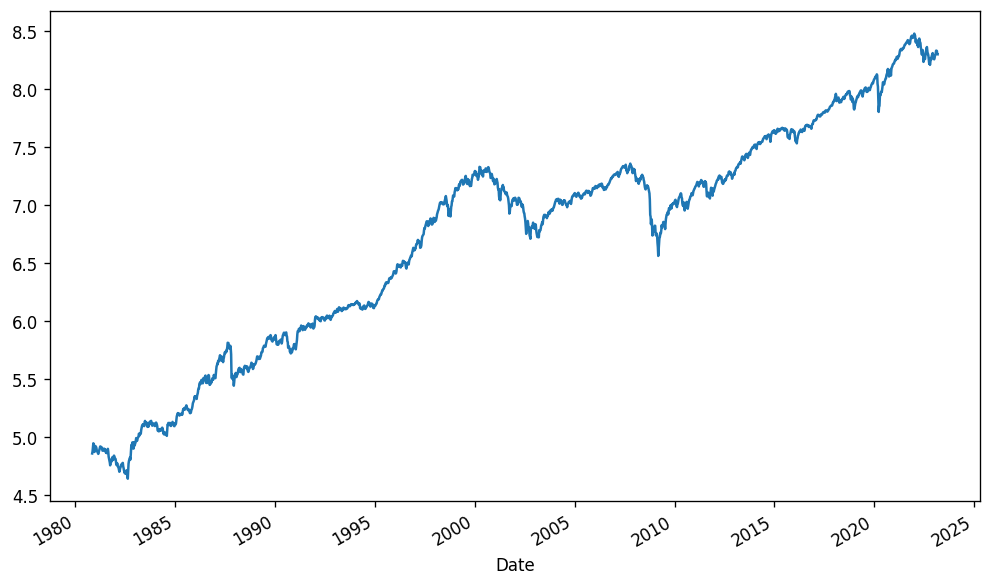

In [28]:
weekly_M2_SP['lnHigh'] = np.log(weekly_M2_SP['High'])
weekly_M2_SP['lnHigh'].dropna().plot()

In [29]:
adf_test(weekly_M2_SP['lnLow'])
kpss_test(weekly_M2_SP['lnLow'])

Results of Dickey-Fuller Test:
Test Statistic                   -0.917628
p-value                           0.782112
#Lags Used                        7.000000
Number of Observations Used    2201.000000
Critical Value (1%)              -3.433325
Critical Value (5%)              -2.862854
Critical Value (10%)             -2.567470
dtype: float64
Results of KPSS Test:
Test Statistic            6.806765
p-value                   0.010000
Lags Used                29.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


C:\Users\Qba\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


Both tests show non-stationarity

<Axes: xlabel='Date'>

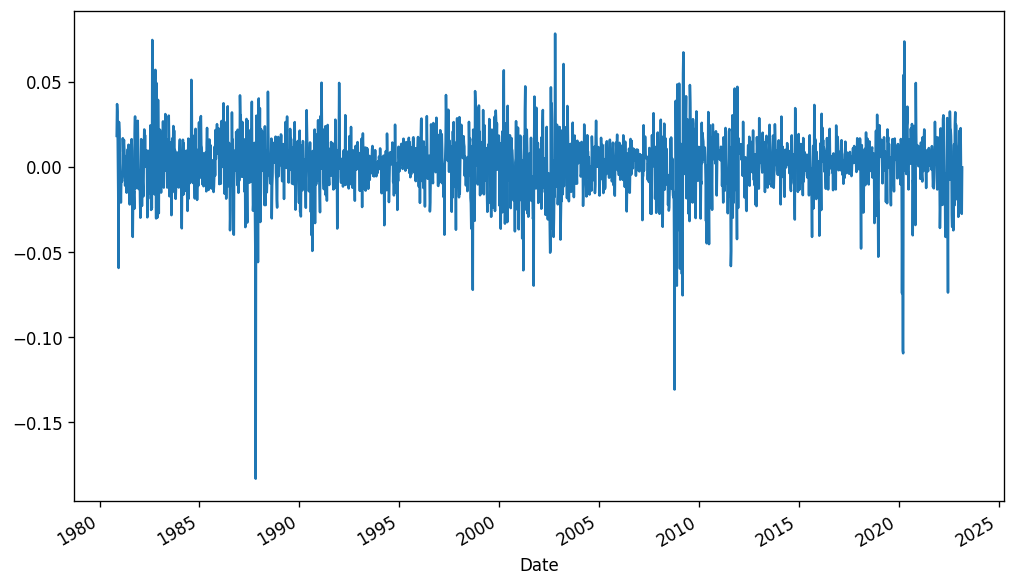

In [30]:
weekly_M2_SP['lnHigh_diff1'] = weekly_M2_SP['lnHigh']- weekly_M2_SP['lnHigh'].shift(1)
weekly_M2_SP['lnHigh_diff1'].dropna().plot()

In [31]:
adf_test(weekly_M2_SP['lnHigh_diff1'].dropna())
kpss_test(weekly_M2_SP['lnHigh_diff1'].dropna())

Results of Dickey-Fuller Test:
Test Statistic                  -23.140050
p-value                           0.000000
#Lags Used                        3.000000
Number of Observations Used    2204.000000
Critical Value (1%)              -3.433320
Critical Value (5%)              -2.862852
Critical Value (10%)             -2.567469
dtype: float64
Results of KPSS Test:
Test Statistic           0.102893
p-value                  0.100000
Lags Used                2.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


C:\Users\Qba\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


Both tests show stationarity

### White noise test Ljung-Box

In [32]:
sm.stats.acorr_ljungbox(weekly_M2_SP['lnHigh_diff1'].dropna(), lags=range(1,12), return_df=True)

,lb_stat,lb_pvalue
1,94.065345,3.052776e-22
2,94.248993,3.420513e-21
3,94.618321,2.230178e-20
4,97.335656,3.629995e-20
5,97.916805,1.452036e-19
6,99.900554,2.632090e-19
7,100.382918,8.992005e-19
8,100.726555,3.032588e-18
9,100.736208,1.116676e-17
10,102.361479,1.833571e-17


## M2 independent variable

In [33]:
adf_test(weekly_M2_SP['WM2NS'])
kpss_test(weekly_M2_SP['WM2NS'])

Results of Dickey-Fuller Test:
Test Statistic                    2.573581
p-value                           0.999070
#Lags Used                       27.000000
Number of Observations Used    2181.000000
Critical Value (1%)              -3.433352
Critical Value (5%)              -2.862866
Critical Value (10%)             -2.567476
dtype: float64
Results of KPSS Test:
Test Statistic            6.363367
p-value                   0.010000
Lags Used                29.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


C:\Users\Qba\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


Both tests show non-stationary

<Axes: xlabel='Date'>

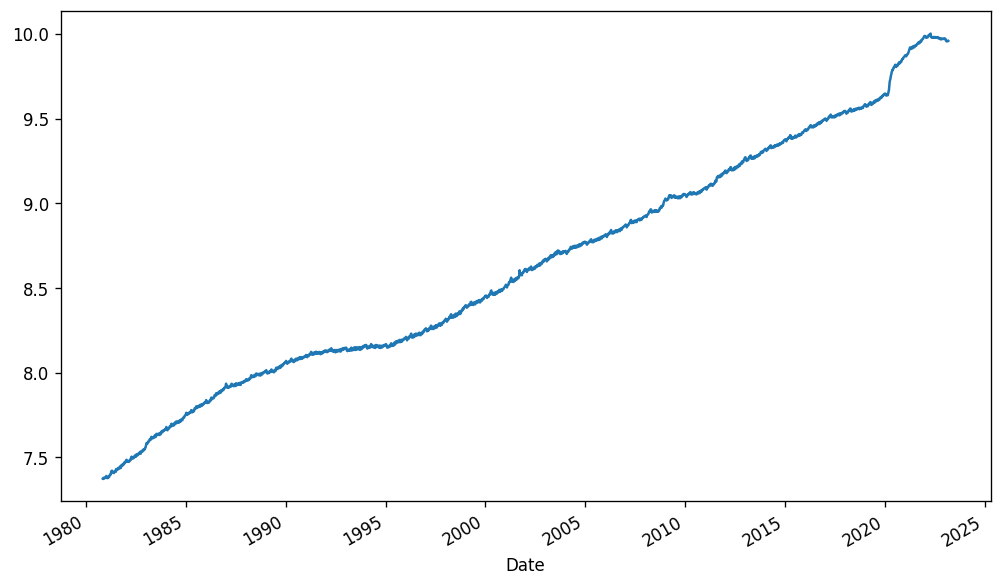

In [34]:
weekly_M2_SP['lnWM2NS'] = np.log(weekly_M2_SP['WM2NS'])
weekly_M2_SP['lnWM2NS'].dropna().plot()

In [35]:
adf_test(weekly_M2_SP['lnWM2NS'])
kpss_test(weekly_M2_SP['lnWM2NS'])

Results of Dickey-Fuller Test:
Test Statistic                    0.127122
p-value                           0.967865
#Lags Used                       27.000000
Number of Observations Used    2181.000000
Critical Value (1%)              -3.433352
Critical Value (5%)              -2.862866
Critical Value (10%)             -2.567476
dtype: float64
Results of KPSS Test:
Test Statistic            7.333331
p-value                   0.010000
Lags Used                29.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


C:\Users\Qba\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


<Axes: xlabel='Date'>

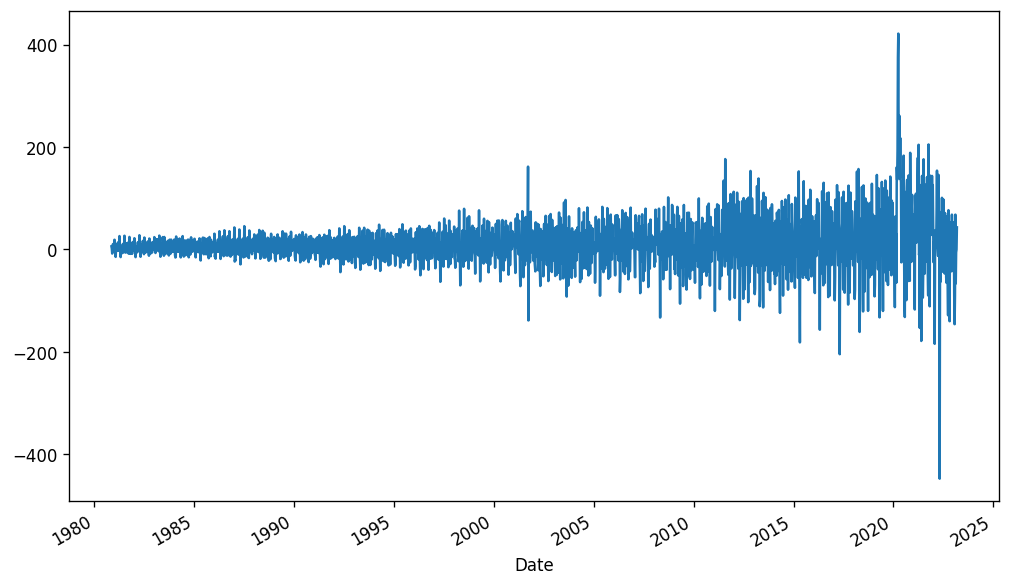

In [36]:
weekly_M2_SP['WM2NS_diff1'] = weekly_M2_SP['WM2NS']-weekly_M2_SP['WM2NS'].shift(1)
weekly_M2_SP['WM2NS_diff1'].dropna().plot()

In [37]:
adf_test(weekly_M2_SP['WM2NS_diff1'].dropna())
kpss_test(weekly_M2_SP['WM2NS_diff1'].dropna())

Results of Dickey-Fuller Test:
Test Statistic                   -5.506809
p-value                           0.000002
#Lags Used                       26.000000
Number of Observations Used    2181.000000
Critical Value (1%)              -3.433352
Critical Value (5%)              -2.862866
Critical Value (10%)             -2.567476
dtype: float64
Results of KPSS Test:
Test Statistic            1.972095
p-value                   0.010000
Lags Used                26.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


C:\Users\Qba\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


<Axes: xlabel='Date'>

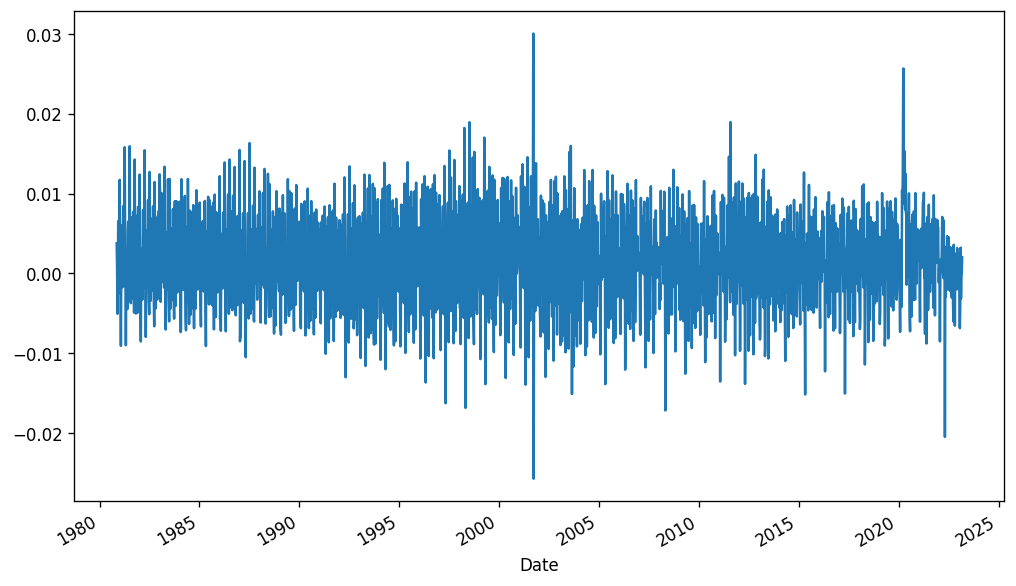

In [38]:
weekly_M2_SP['lnWM2NS_diff1'] = weekly_M2_SP['lnWM2NS']-weekly_M2_SP['lnWM2NS'].shift(1)
weekly_M2_SP['lnWM2NS_diff1'].dropna().plot()

In [39]:
adf_test(weekly_M2_SP['lnWM2NS_diff1'].dropna())
kpss_test(weekly_M2_SP['lnWM2NS_diff1'].dropna())

Results of Dickey-Fuller Test:
Test Statistic                -7.031311e+00
p-value                        6.175038e-10
#Lags Used                     2.700000e+01
Number of Observations Used    2.180000e+03
Critical Value (1%)           -3.433353e+00
Critical Value (5%)           -2.862867e+00
Critical Value (10%)          -2.567476e+00
dtype: float64
Results of KPSS Test:
Test Statistic            0.212478
p-value                   0.100000
Lags Used                29.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


C:\Users\Qba\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


In [40]:
sm.stats.acorr_ljungbox(weekly_M2_SP['lnWM2NS_diff1'].dropna(), lags=range(1,12), return_df=True)

,lb_stat,lb_pvalue
1,1.978949,1.595012e-01
2,327.967059,6.065380e-72
3,519.522254,2.803830e-112
4,1140.587942,1.205966e-245
5,1288.261934,2.230034e-276
6,1617.844014,0.000000e+00
7,1946.509978,0.000000e+00
8,2058.219418,0.000000e+00
9,2700.413768,0.000000e+00
10,2879.234893,0.000000e+00


Difference of logarithms passes both tests for stationarity

## Stationarity results
High series should be converted to difference of logarithms in order to achieve stationarity and not a white noise

Low series should be converted to difference of logarithms in order to achieve stationarity and not a white noise 

M2 series should be converted to difference of logarithms in order to achieve stationarity and not a white noise 

# VARMAX

In [41]:
weekly_M2_SP.dropna(inplace=True)

## Choosing p and q

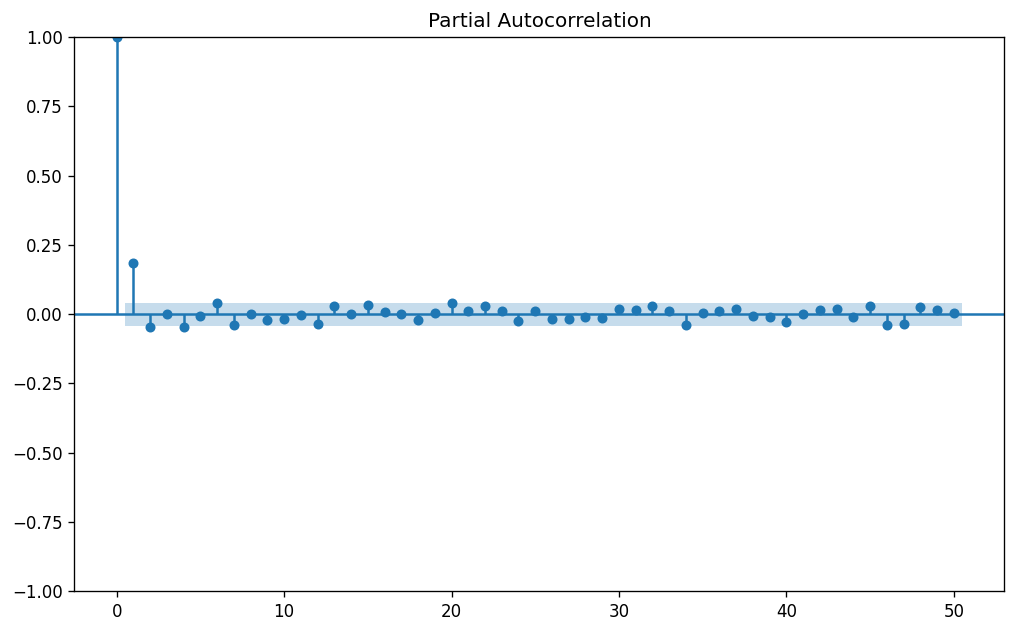

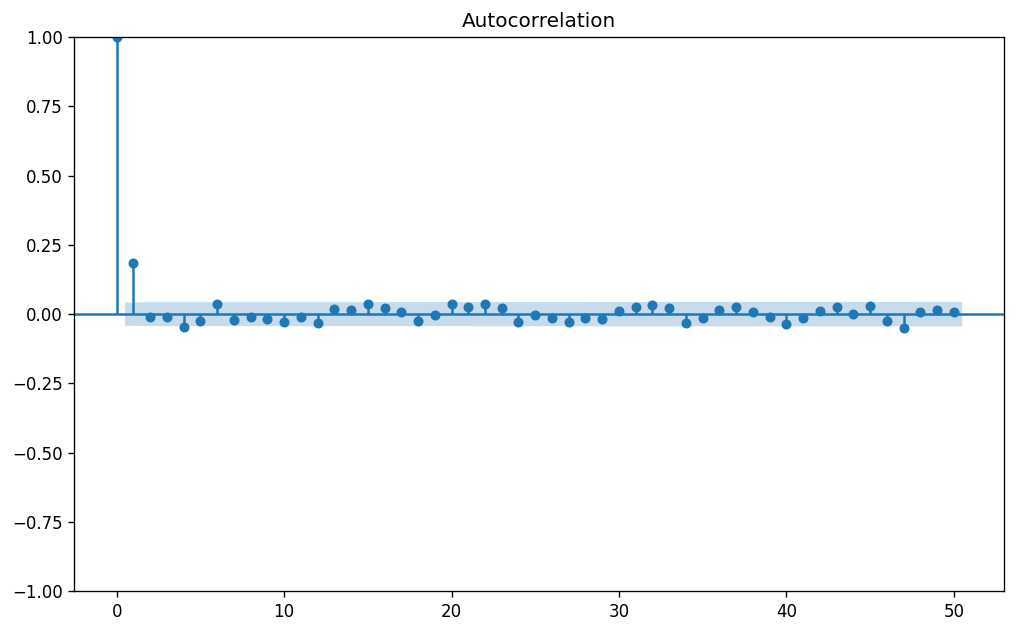

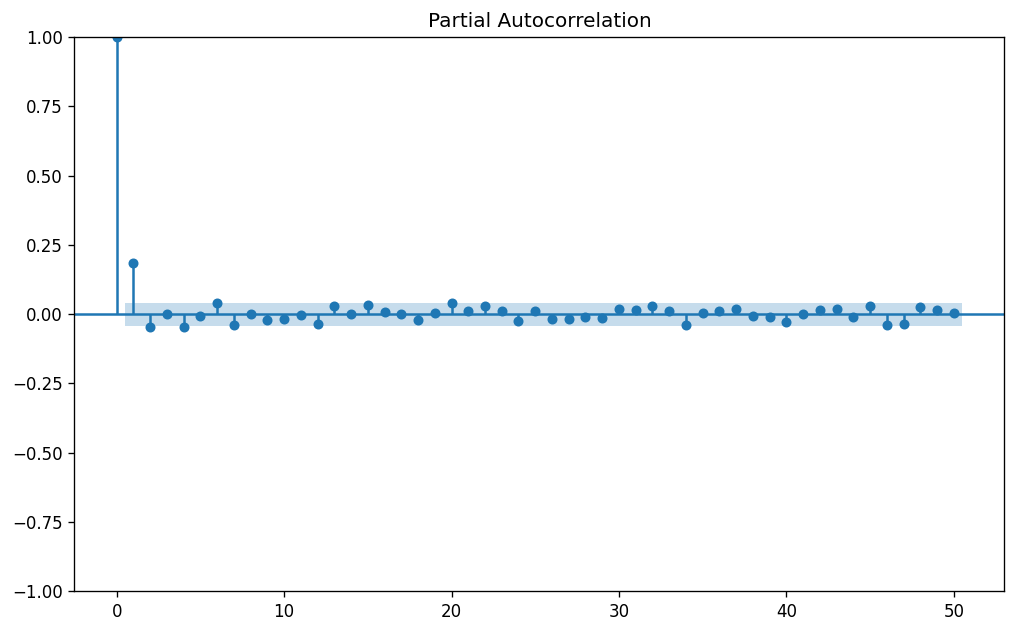

In [42]:
sm.graphics.tsa.plot_acf(weekly_M2_SP["lnLow_diff1"].values.squeeze(), lags=50)
sm.graphics.tsa.plot_pacf(weekly_M2_SP["lnLow_diff1"].values.squeeze(), lags=50, method="ywm")

Box-Jenkins p=3 q=3

## Model choice

In [43]:
import itertools
import warnings

In [44]:

p = range(0,4)
q = range(0,4)
# for already differentiated series
pq = list(itertools.product(p, q))

We use train set without last 12 months and test set last 12 months

In [53]:
warnings.filterwarnings("ignore")
varmax_comparison = pd.DataFrame(columns=['p','q','AIC','BIC'])
for param in pq[1:]:
    try: 
        mod = sm.tsa.VARMAX(endog=weekly_M2_SP[['lnLow_diff1','lnHigh_diff1']][:-12],\
                                        exog=weekly_M2_SP['lnWM2NS_diff1'][:-12],
                                        trend='n',
                                        order=param)

        results = mod.fit(maxiter=1000)
        varmax_comparison.loc[len(varmax_comparison.index)] = [param[0],param[1],results.aic,results.bic]
    except:
        varmax_comparison.loc[len(varmax_comparison.index)] = [param[0],param[1],None,None]
        print(f"Error for p {param[0]}, q{param[1]}")
    varmax_comparison.to_csv('./data/outputs/varmax_comparison_M2_SP_weekly.csv')
    print(f"Iteration finished for {param}")

Iteration finished for (0, 1)
Iteration finished for (0, 2)
Iteration finished for (0, 3)
Iteration finished for (1, 0)
Iteration finished for (1, 1)
Iteration finished for (1, 2)
Iteration finished for (1, 3)
Iteration finished for (2, 0)
Iteration finished for (2, 1)
Iteration finished for (2, 2)
Iteration finished for (2, 3)
Iteration finished for (3, 0)
Iteration finished for (3, 1)
Iteration finished for (3, 2)
Iteration finished for (3, 3)


In [54]:
# varmax_comparison.to_csv('./data/outputs/varmax_comparison_M2_SP.csv')
varmax_comparison.sort_values(by=['AIC']).head()


,p,q,AIC,BIC
2,0.0,3.0,-29650.740524,-29553.935847
6,1.0,3.0,-29638.373347,-29518.791098
10,2.0,3.0,-29620.440371,-29478.080551
11,3.0,0.0,-29613.303943,-29516.499265
14,3.0,3.0,-29609.101133,-29443.963742


# Final Model and summary

Basing on AIC we choose p=2 and q=3

In [55]:
mod = sm.tsa.VARMAX(endog=weekly_M2_SP[['lnLow_diff1','lnHigh_diff1']][:-12],\
                                        exog=weekly_M2_SP['lnWM2NS_diff1'][:-12],
                                        trend='n',
                                        order=(0,3))

results = mod.fit(maxiter=10000)
print(results.summary())

                                  Statespace Model Results                                 
Dep. Variable:     ['lnLow_diff1', 'lnHigh_diff1']   No. Observations:                 2196
Model:                                     VMAX(3)   Log Likelihood               14842.370
Date:                             Sat, 22 Apr 2023   AIC                         -29650.741
Time:                                     20:51:50   BIC                         -29553.936
Sample:                                          0   HQIC                        -29615.364
                                            - 2196                                         
Covariance Type:                               opg                                         
Ljung-Box (L1) (Q):             0.73, 7.78   Jarque-Bera (JB):    7828.17, 15259.09
Prob(Q):                        0.39, 0.01   Prob(JB):                   0.00, 0.00
Heteroskedasticity (H):         1.28, 0.83   Skew:                      -1.14, 1.18
Prob(H) (two

In [57]:
for table in results.summary().tables:
    print('#################################################')
    print(table.as_latex_tabular())

#################################################
\begin{center}
\begin{tabular}{lclc}
\toprule
\textbf{Dep. Variable:}   & ['lnLow\_diff1', 'lnHigh\_diff1'] & \textbf{  No. Observations:  } &    2196     \\
\textbf{Model:}           &              VMAX(3)              & \textbf{  Log Likelihood     } & 14842.370   \\
\textbf{Date:}            &          Sat, 22 Apr 2023         & \textbf{  AIC                } & -29650.741  \\
\textbf{Time:}            &              20:52:00             & \textbf{  BIC                } & -29553.936  \\
\textbf{Sample:}          &                 0                 & \textbf{  HQIC               } & -29615.364  \\
\textbf{}                 &               - 2196              & \textbf{                     } &             \\
\textbf{Covariance Type:} &                opg                & \textbf{                     } &             \\
\bottomrule
\end{tabular}
%\caption{Statespace Model Results}
\end{center}
#############################################

# Prediction

In [91]:
frcst = results.forecast(steps=12, exog=weekly_M2_SP['lnWM2NS_diff1'][-12:])
frcst['Low'] = np.exp(weekly_M2_SP['lnLow'][-13] + np.cumsum(frcst['lnLow_diff1']))
frcst['High'] = np.exp(weekly_M2_SP["lnHigh"][-13] + np.cumsum(frcst['lnHigh_diff1']))
frcst.set_index(weekly_M2_SP["lnHigh"][-12:].index, inplace=True))

SyntaxError: unmatched ')' (2707207464.py, line 4)

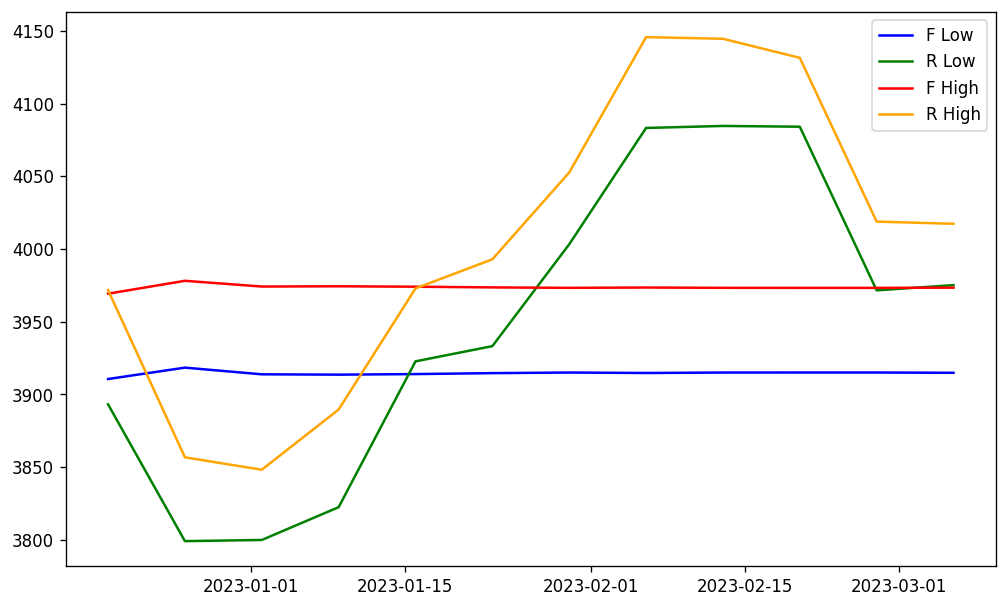

In [92]:
fig, ax = plt.subplots()
ax.plot(frcst['Low'], "b", label="F Low")
ax.plot(weekly_M2_SP['Low'][-12:], "g", label="R Low")
ax.plot(frcst['High'], "r", label="F High")
ax.plot(weekly_M2_SP['High'][-12:], "orange", label="R High")
ax.legend(loc="best")

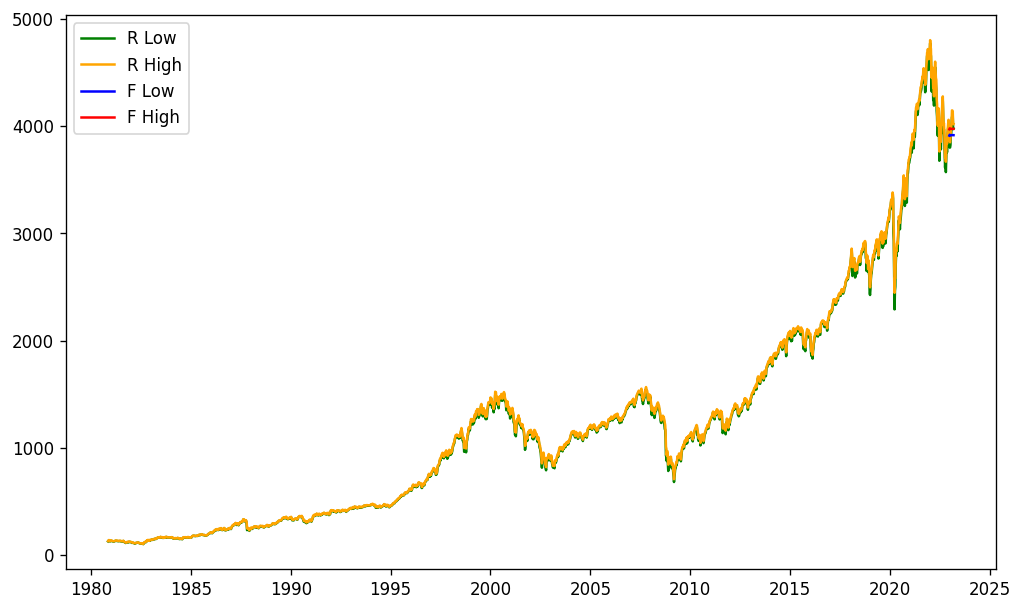

In [93]:
fig, ax = plt.subplots()
ax.plot(weekly_M2_SP['Low'], "g", label="R Low")
ax.plot(weekly_M2_SP['High'], "orange", label="R High")
ax.plot(frcst['Low'], "b", label="F Low")
ax.plot(frcst['High'], "r", label="F High")
ax.legend(loc="best")

In [81]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
def MAPE(y_true,y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true-y_pred)/y_true)) * 100

In [82]:
print("########### Low ###########")
print('MRSE ', mean_squared_error(weekly_M2_SP['Low'][-12:],frcst['Low']))
print('MAE ', mean_absolute_error(weekly_M2_SP['Low'][-12:],frcst['Low']))
print('MAPE ', MAPE(weekly_M2_SP['Low'][-12:],frcst['Low']))
print("########### High ###########")
print('MRSE ', mean_squared_error(weekly_M2_SP['High'][-12:],frcst['High']))
print('MAE ', mean_absolute_error(weekly_M2_SP['High'][-12:],frcst['High']))
print('MAPE ', MAPE(weekly_M2_SP['High'][-12:],frcst['High']))

########### Low ###########
MRSE  11378.276684616836
MAE  90.08938643248166
MAPE  2.26844062453799
########### High ###########
MRSE  11037.393941820706
MAE  85.45810682560337
MAPE  2.1228014476508656
